In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('../../supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Format

### Data Type

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

### Unique Values

In [4]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

- Invoice ID is just unique ID so not useful.
- Gross margin percentage only have 1 value **(4.76)** so also not useful.
- Other column can be useful

### Null Values

In [5]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

# Exploratory Data Analysis

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,1900-01-01 15:24:41.879999744,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,1900-01-01 10:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,1900-01-01 12:43:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,1900-01-01 15:19:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,1900-01-01 18:15:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,1900-01-01 20:59:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858


### Boxplot

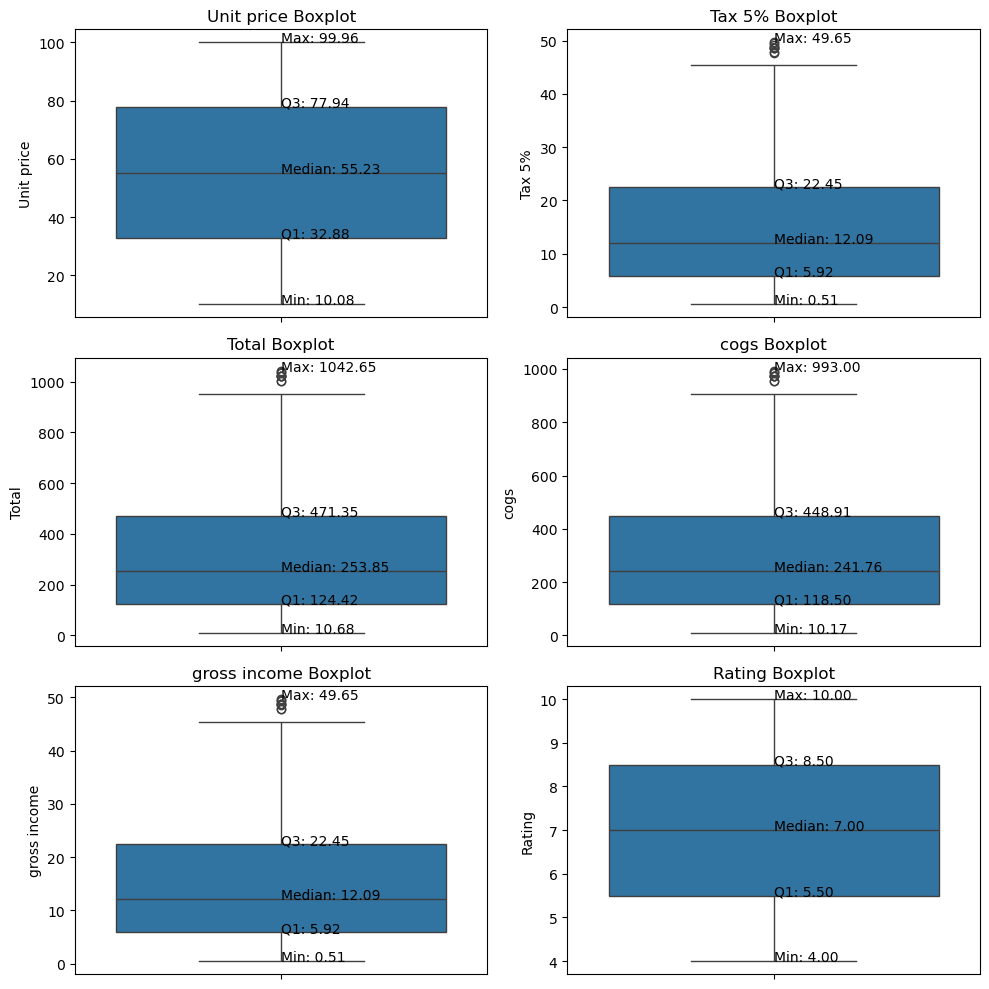

In [7]:
def draw_boxplot(columns):
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))
    axs = axs.flatten()

    for i, column in enumerate(columns):
        data = df[column]
        sns.boxplot(data=data, ax=axs[i])
        
        min_val = np.min(data)
        q1_val = np.percentile(data, 25)
        median_val = np.median(data)
        q3_val = np.percentile(data, 75)
        max_val = np.max(data)

        axs[i].set_title(f'{column} Boxplot')
        axs[i].text(0, min_val, f'Min: {min_val:.2f}', horizontalalignment='left') 
        axs[i].text(0, q1_val, f'Q1: {q1_val:.2f}', horizontalalignment='left') 
        axs[i].text(0, median_val, f'Median: {median_val:.2f}', horizontalalignment='left') 
        axs[i].text(0, q3_val, f'Q3: {q3_val:.2f}', horizontalalignment='left') 
        axs[i].text(0, max_val, f'Max: {max_val:.2f}', horizontalalignment='left')

    plt.tight_layout()
    plt.show()

continuous_data = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
draw_boxplot(continuous_data)

### Histogram

<Axes: xlabel='Quantity', ylabel='Count'>

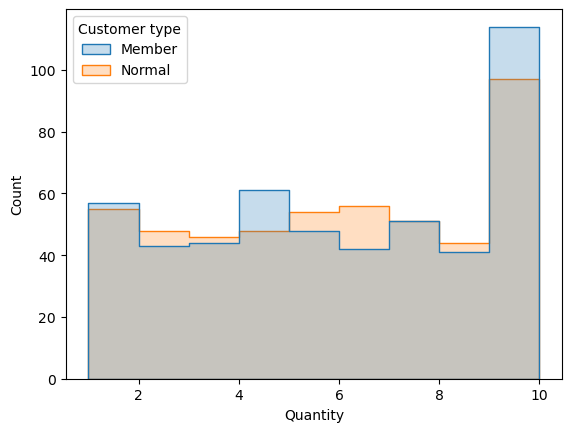

In [8]:
sns.histplot(data=df, x="Quantity", binwidth=1, hue='Customer type', element="step")

# Data Pre-processing

In [9]:
df['Customer type Numeric'] = df['Customer type'].map({'Member': 1, 'Normal': 0})
df['Gender Numeric'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [10]:
# Branch : [A, B, C]

ohe = OneHotEncoder(use_cat_names=True)
branch_data = ohe.fit_transform(df['Branch'])
branch_data = branch_data.loc[:, ['Branch_A', 'Branch_B']]

df = pd.concat([df, branch_data], axis = 1)

In [11]:
# Payment : [Ewallet, Credit card, Cash]

ohe = OneHotEncoder(use_cat_names=True)
payment_data = ohe.fit_transform(df['Payment'])
payment_data = payment_data.loc[:, ['Payment_Ewallet', 'Payment_Credit card']]

df = pd.concat([df, payment_data], axis = 1)

In [12]:
# Product = ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']

product_list = list(df['Product line'].unique())
product_list = ["Product_" + product for product in product_list]

ohe = OneHotEncoder(use_cat_names=True)
product_data = ohe.fit_transform(df['Product line'])
product_data.columns = product_list
product_data = product_data.loc[:, product_list[:-1]]

df = pd.concat([df, product_data], axis = 1)

In [13]:
df['year'] = df['Date'].dt.year 
df['month'] = df['Date'].dt.month 
df['day'] = df['Date'].dt.day 
df['hour'] = df['Time'].dt.hour 
df['minute'] = df['Time'].dt.minute

In [14]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Customer type Numeric', 'Gender Numeric', 'Branch_A',
       'Branch_B', 'Payment_Ewallet', 'Payment_Credit card',
       'Product_Health and beauty', 'Product_Electronic accessories',
       'Product_Home and lifestyle', 'Product_Sports and travel',
       'Product_Food and beverages', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [15]:
useful_features = ['Customer type Numeric', 'Gender Numeric',
                   'Branch_A', 'Branch_B',
                   'Payment_Ewallet', 'Payment_Credit card', 
                   'Product_Health and beauty', 'Product_Electronic accessories', 'Product_Home and lifestyle', 
                   'Product_Sports and travel', 'Product_Food and beverages',
                   'Unit price', 'Quantity', 'Tax 5%', 'Total',
                   'cogs', 'gross income', 'Rating',
                   'year', 'month', 'day', 'hour', 'minute']

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[useful_features])

# Modelling (K-Means)

### Elbow method to determine number of cluster

C:\Users\khais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\khais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\khais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\khais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

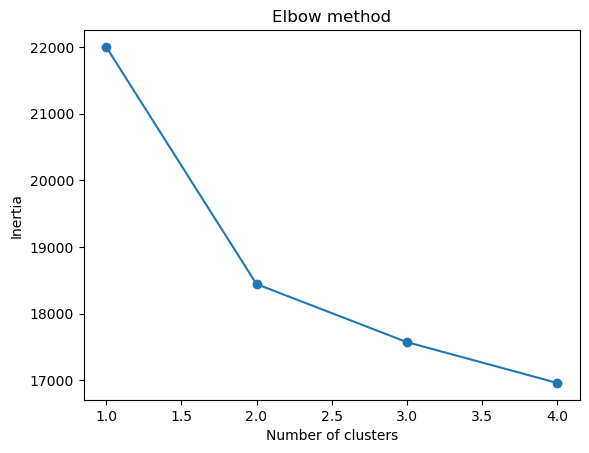

In [16]:
inertias = []
for i in range(1,5):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,5), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### PCA for better visualisation

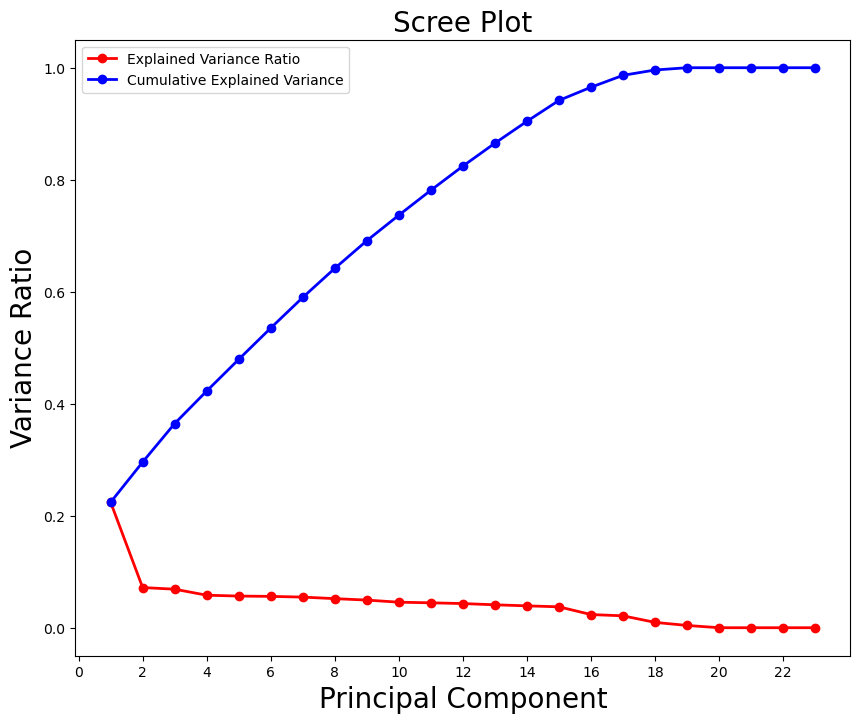

In [17]:
principal = PCA()
principal.fit(normalized_data)
pca_data = principal.transform(normalized_data)

fig = plt.figure(figsize=(10, 8))
sing_vals = np.arange(len(principal.components_)) + 1
plt.plot(sing_vals, principal.explained_variance_ratio_, 'ro-', linewidth=2, label='Explained Variance Ratio')
plt.plot(sing_vals, np.cumsum(principal.explained_variance_ratio_), 'bo-', linewidth=2, label='Cumulative Explained Variance')

plt.title('Scree Plot', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)
plt.ylabel('Variance Ratio', fontsize=20)
plt.xticks(np.arange(0, len(principal.components_) + 1, 2))
plt.legend(fontsize=10)

plt.show()

### Visualise K-Means Label with PCA Data

C:\Users\khais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<Axes: xlabel='pca_1', ylabel='pca_2'>

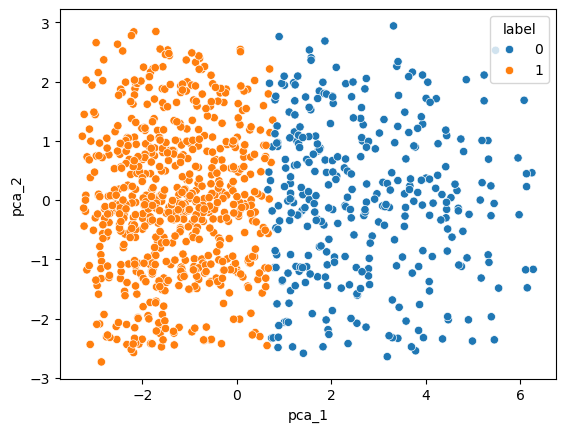

In [18]:
pca_df = pd.DataFrame(pca_data[:, :2], columns = ['pca_1', 'pca_2'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(normalized_data)

result = pd.concat([pca_df, pd.DataFrame(kmeans.labels_, columns = ['label'])], axis = 1)

sns.scatterplot(data=result, x="pca_1", y="pca_2", hue="label")

In [19]:
new_df = pd.concat([df, pd.DataFrame(kmeans.labels_, columns = ['label'])], axis = 1)

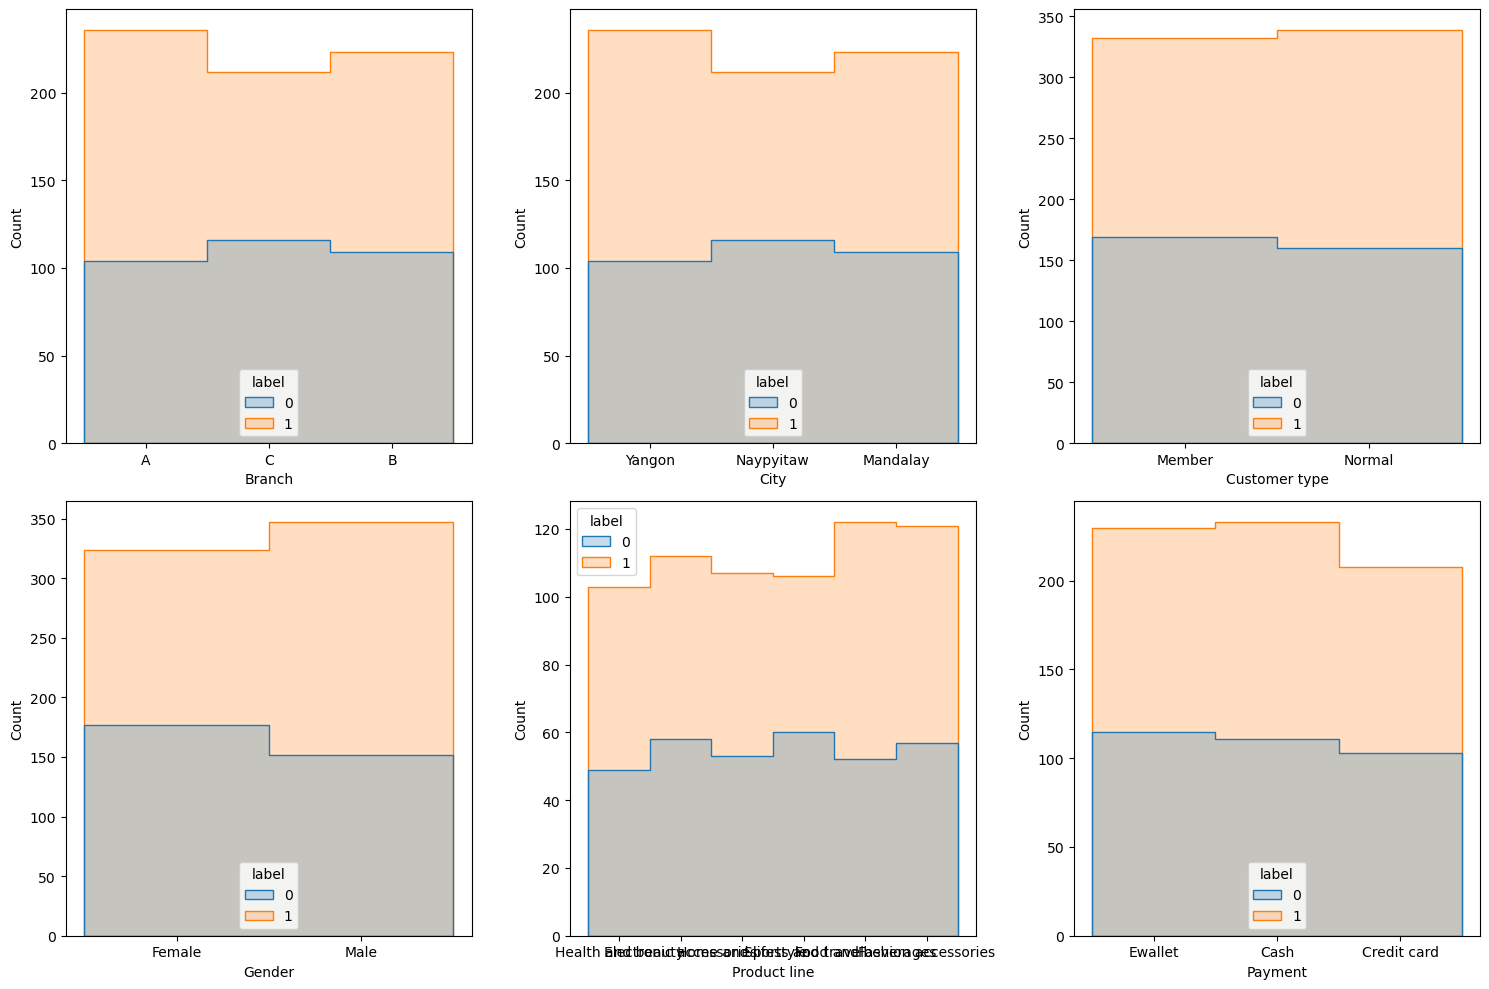

In [20]:
visualise_discrete_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

# 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage', 'gross income', 'Rating' 

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(visualise_discrete_features):
    sns.histplot(data=new_df, x=feature, hue='label', element="step", ax = axs[i])

plt.tight_layout()

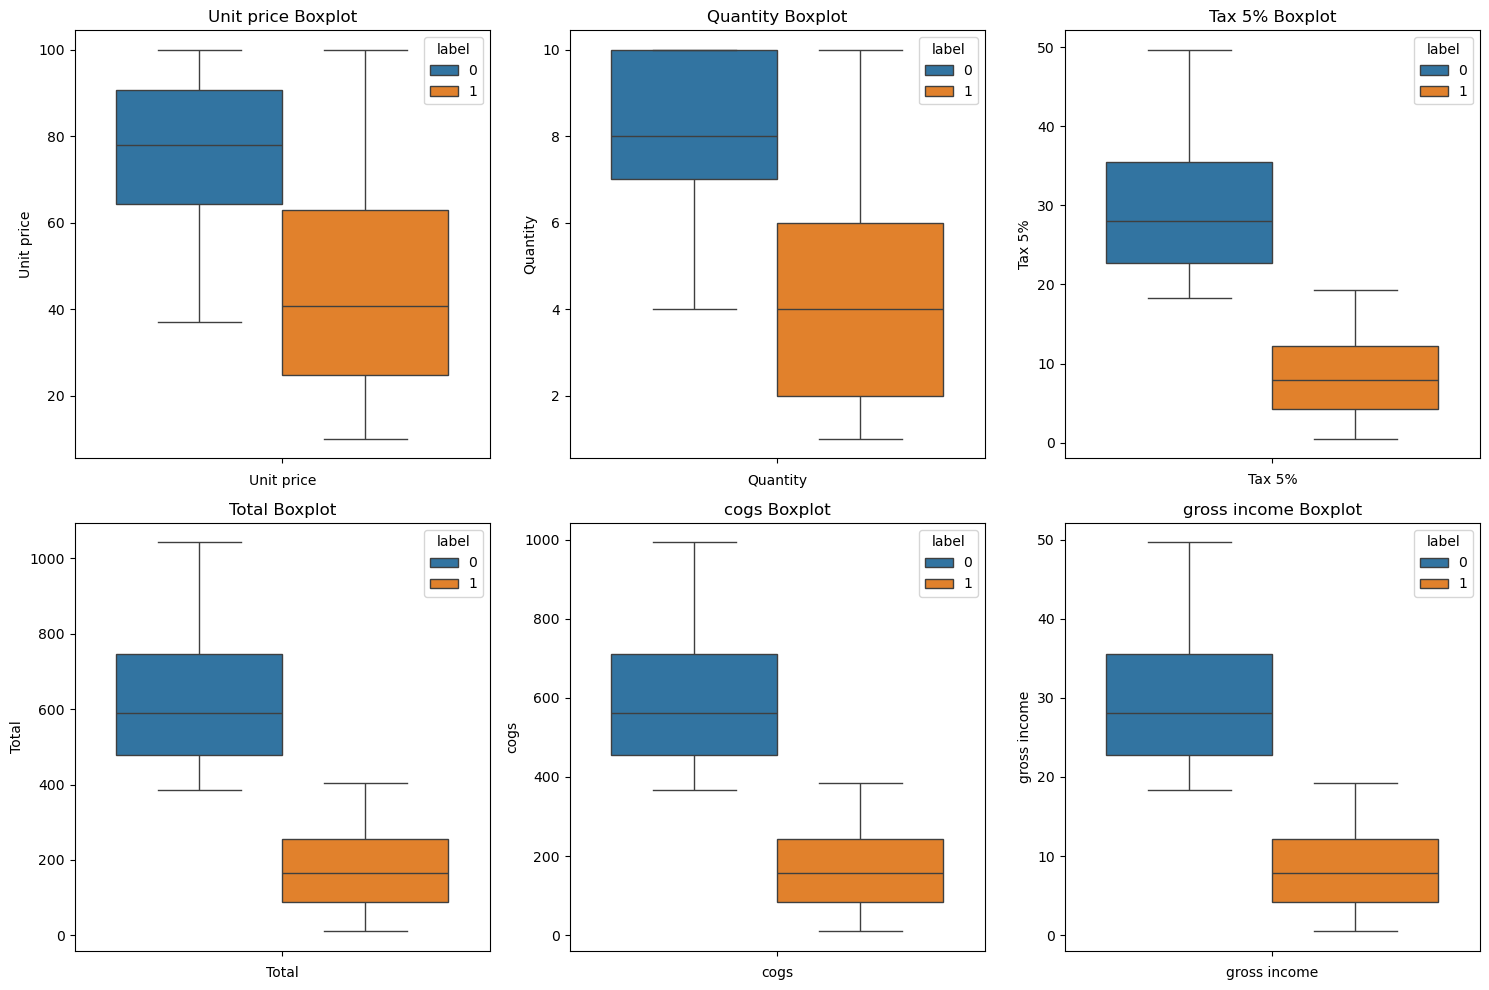

In [21]:
# Rating is also the same (alreday visualise)
visualise_continuous_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(visualise_continuous_features):
    sns.boxplot(data=new_df, y=feature, hue='label', ax = axs[i])

    axs[i].set_title(f'{feature} Boxplot')
    axs[i].set_xlabel(feature)

plt.tight_layout()

In [22]:
for label in new_df['label'].unique(): 
    label_data = new_df[new_df['label'] == label]
    print(f"Label {label}")
    display(label_data.describe())

Label 0


,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,...,Product_Electronic accessories,Product_Home and lifestyle,Product_Sports and travel,Product_Food and beverages,year,month,day,hour,minute,label
count,329.000000,329.000000,329.000000,329.000000,329,329,329.000000,3.290000e+02,329.000000,329.000000,...,329.000000,329.000000,329.000000,329.000000,329.0,329.000000,329.000000,329.000000,329.000000,329.0
mean,76.583404,7.893617,29.640918,622.459277,2019-02-13 09:20:14.589665536,1900-01-01 15:25:57.082066688,592.818359,4.761905e+00,29.640918,6.942249,...,0.176292,0.161094,0.182371,0.158055,2019.0,1.963526,15.513678,14.954407,28.686930,0.0
min,36.980000,4.000000,18.308000,384.468000,2019-01-01 00:00:00,1900-01-01 10:00:00,366.160000,4.761905e+00,18.308000,4.000000,...,0.000000,0.000000,0.000000,0.000000,2019.0,1.000000,1.000000,10.000000,0.000000,0.0
25%,64.260000,7.000000,22.740000,477.540000,2019-01-24 00:00:00,1900-01-01 12:44:00,454.800000,4.761905e+00,22.740000,5.400000,...,0.000000,0.000000,0.000000,0.000000,2019.0,1.000000,8.000000,12.000000,14.000000,0.0
50%,77.950000,8.000000,28.020000,588.420000,2019-02-11 00:00:00,1900-01-01 15:10:00,560.400000,4.761905e+00,28.020000,7.000000,...,0.000000,0.000000,0.000000,0.000000,2019.0,2.000000,15.000000,15.000000,28.000000,0.0
75%,90.630000,10.000000,35.516000,745.836000,2019-03-06 00:00:00,1900-01-01 18:19:00,710.320000,4.761905e+00,35.516000,8.500000,...,0.000000,0.000000,0.000000,0.000000,2019.0,3.000000,23.000000,18.000000,43.000000,0.0
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,1900-01-01 20:55:00,993.000000,4.761905e+00,49.650000,10.000000,...,1.000000,1.000000,1.000000,1.000000,2019.0,3.000000,31.000000,20.000000,59.000000,0.0
std,16.599609,1.780035,8.067353,169.414418,NaN,NaN,161.347065,1.512203e-14,8.067353,1.777693,...,0.381649,0.368178,0.386738,0.365348,0.0,0.836591,8.758304,3.186440,17.194259,0.0


Label 1


,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,...,Product_Electronic accessories,Product_Home and lifestyle,Product_Sports and travel,Product_Food and beverages,year,month,day,hour,minute,label
count,671.000000,671.000000,671.000000,671.000000,671,671,671.000000,6.710000e+02,671.000000,671.000000,...,671.000000,671.000000,671.000000,671.000000,671.0,671.000000,671.000000,671.000000,671.000000,671.0
mean,45.419061,4.341282,8.386747,176.121680,2019-02-14 07:19:56.423248896,1900-01-01 15:24:05.007451648,167.734933,4.761905e+00,8.386747,6.987630,...,0.166915,0.159463,0.157973,0.181818,2019.0,2.007452,15.129657,14.888227,30.789866,1.0
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,1900-01-01 10:00:00,10.170000,4.761905e+00,0.508500,4.000000,...,0.000000,0.000000,0.000000,0.000000,2019.0,1.000000,1.000000,10.000000,0.000000,1.0
25%,24.915000,2.000000,4.232750,88.887750,2019-01-25 00:00:00,1900-01-01 12:41:00,84.655000,4.761905e+00,4.232750,5.600000,...,0.000000,0.000000,0.000000,0.000000,2019.0,1.000000,7.000000,12.000000,17.000000,1.0
50%,40.730000,4.000000,7.878500,165.448500,2019-02-14 00:00:00,1900-01-01 15:25:00,157.570000,4.761905e+00,7.878500,6.900000,...,0.000000,0.000000,0.000000,0.000000,2019.0,2.000000,15.000000,15.000000,31.000000,1.0
75%,62.860000,6.000000,12.180750,255.795750,2019-03-08 00:00:00,1900-01-01 18:14:00,243.615000,4.761905e+00,12.180750,8.400000,...,0.000000,0.000000,0.000000,0.000000,2019.0,3.000000,23.000000,18.000000,44.500000,1.0
max,99.890000,10.000000,19.264000,404.544000,2019-03-30 00:00:00,1900-01-01 20:59:00,385.280000,4.761905e+00,19.264000,10.000000,...,1.000000,1.000000,1.000000,1.000000,2019.0,3.000000,31.000000,20.000000,59.000000,1.0
std,24.326118,2.652188,4.869478,102.259029,NaN,NaN,97.389551,5.066394e-14,4.869478,1.689991,...,0.373178,0.366381,0.364988,0.385982,0.0,0.834841,8.665399,3.189212,16.694148,0.0


# Modelling (Hierarchical Clustering)

<Axes: xlabel='pca_1', ylabel='pca_2'>

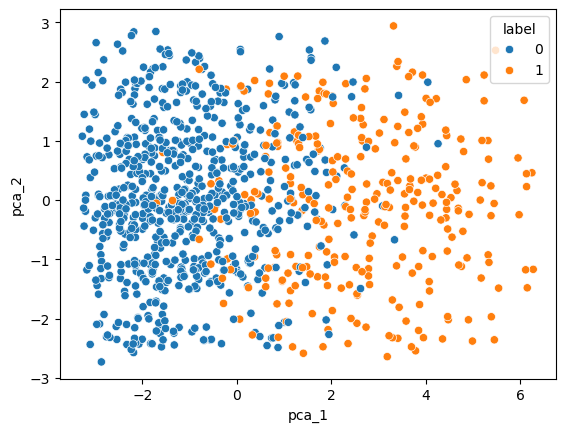

In [23]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
label = agg_clustering.fit_predict(normalized_data)

result = pd.concat([pca_df, pd.DataFrame(label, columns = ['label'])], axis = 1)
sns.scatterplot(data=result, x="pca_1", y="pca_2", hue="label")

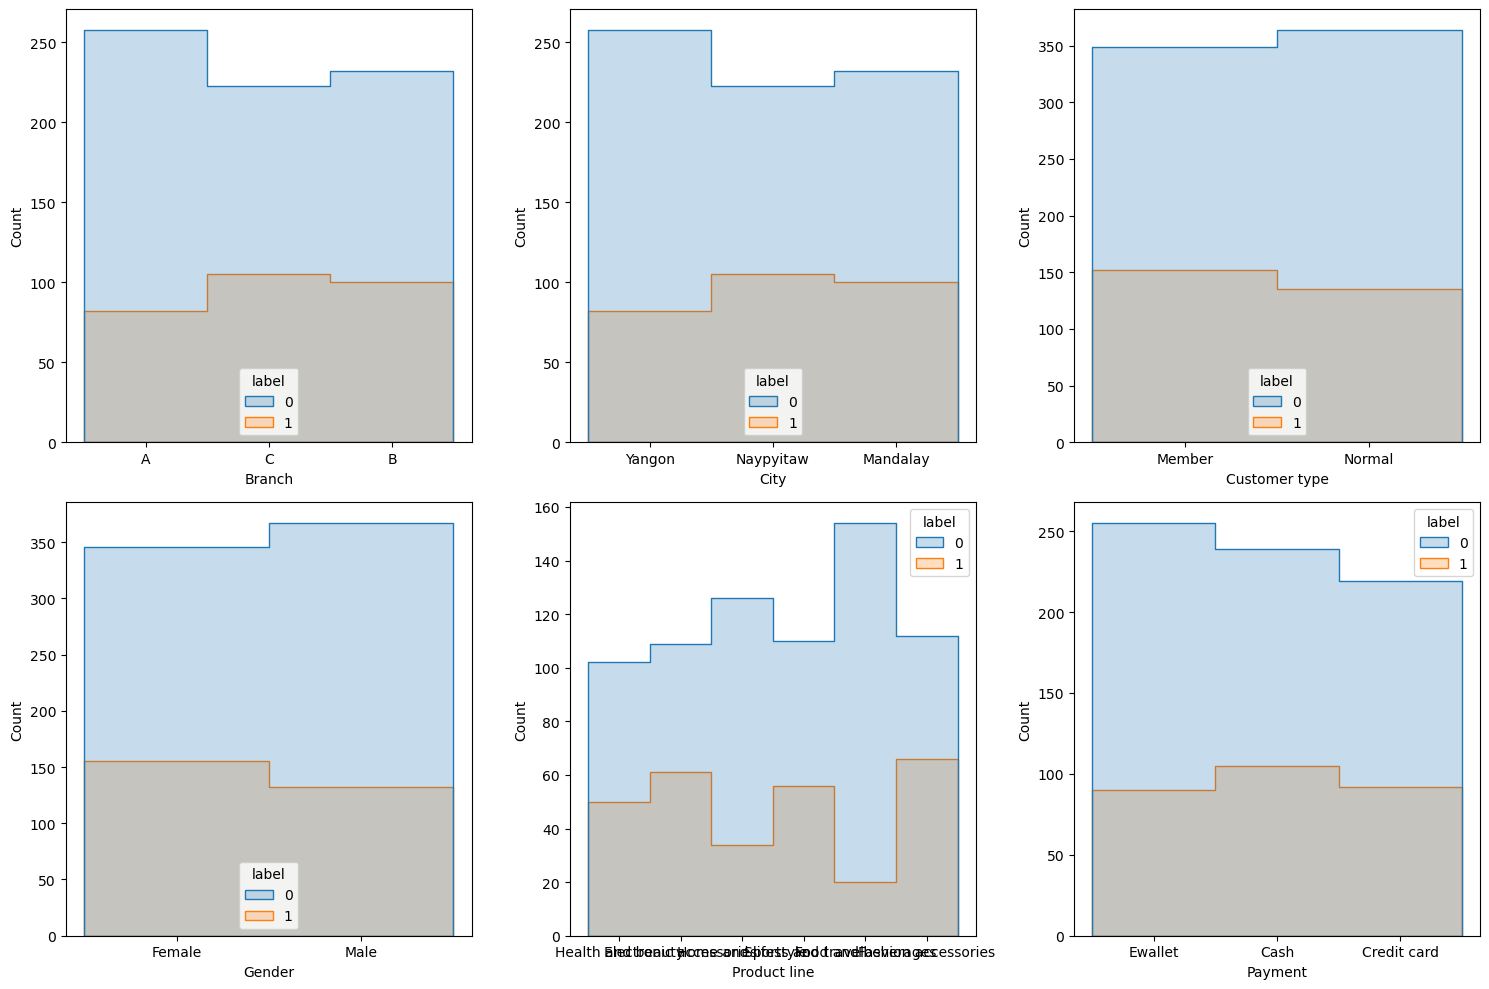

In [24]:
new_df = pd.concat([df, pd.DataFrame(label, columns = ['label'])], axis = 1)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(visualise_discrete_features):
    sns.histplot(data=new_df, x=feature, hue='label', element="step", ax = axs[i])

plt.tight_layout()

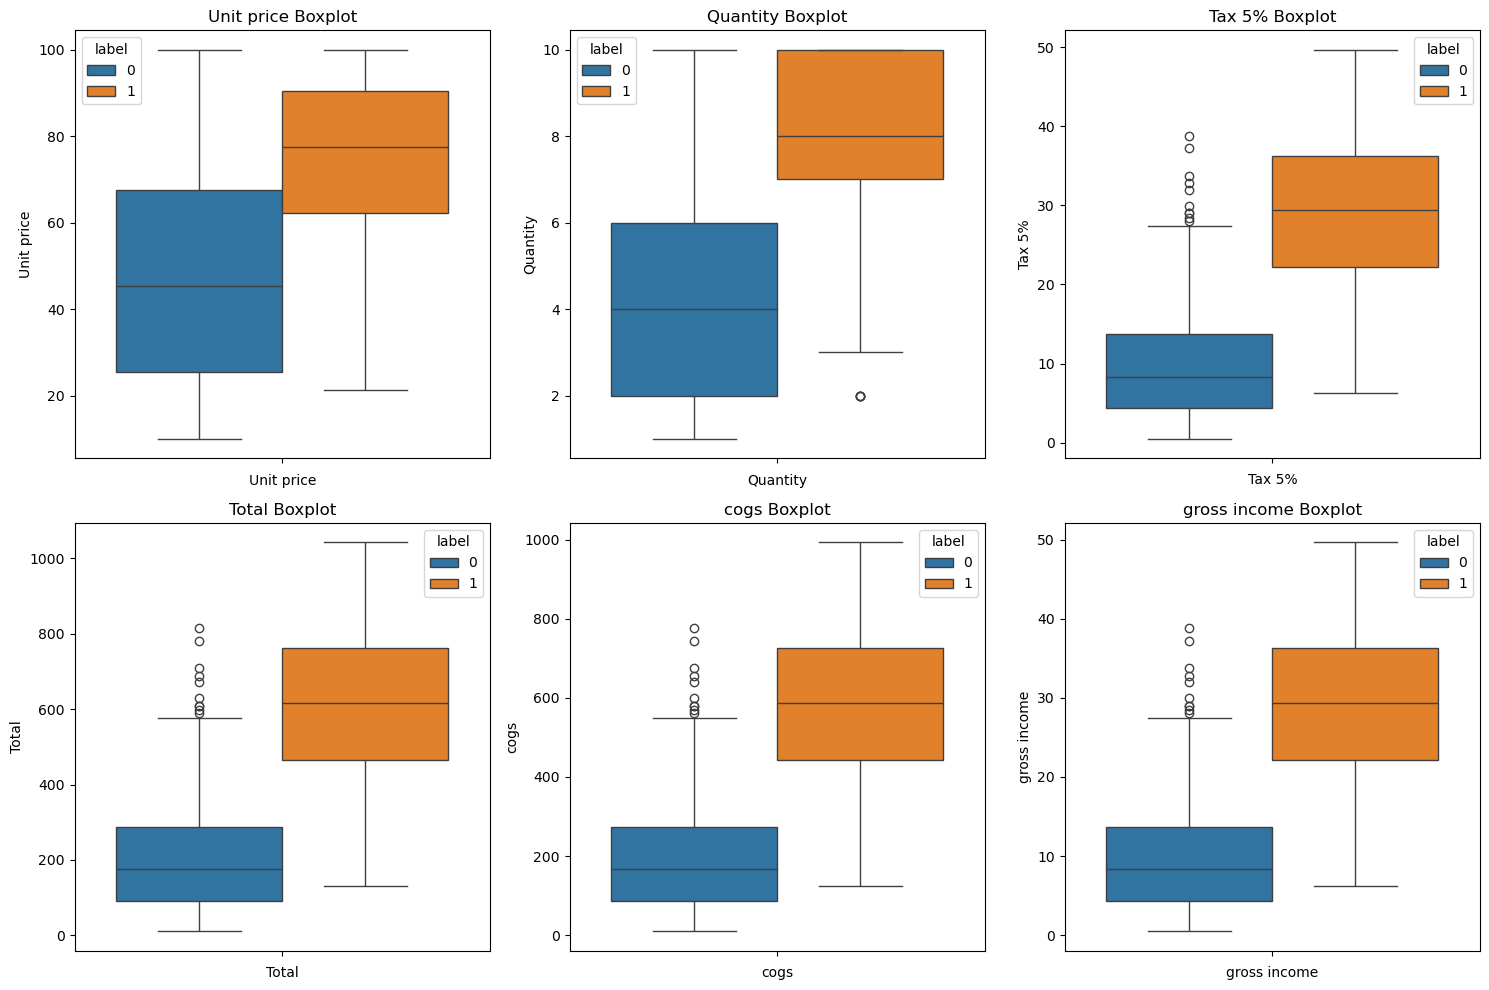

In [25]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(visualise_continuous_features):
    sns.boxplot(data=new_df, y=feature, hue='label', ax = axs[i])

    axs[i].set_title(f'{feature} Boxplot')
    axs[i].set_xlabel(feature)

plt.tight_layout()

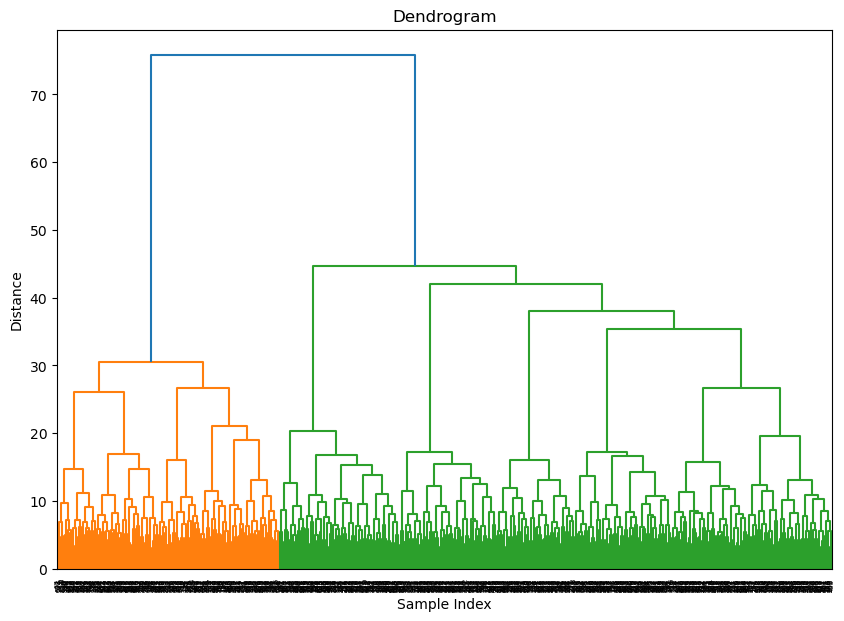

In [26]:
# Generate the linkage matrix
Z = linkage(normalized_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()